**In this Notebook we work on Titanic passengers database and make predictions on their survival. We use scikit-learn package, please feel free to learn classification in scikit from here https://scikit-learn.org/stable/supervised_learning.html#supervised-learning
Most of the functions needed for the homework are in the notebook, please look at the arguments for each function and play with them to improve your understanding**



In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd
from IPython.display import clear_output
from matplotlib import pyplot as plt
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn import metrics
# Load dataset.
dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv')
dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv')
y_train = dftrain.pop('survived')
y_eval = dfeval.pop('survived')


**Explore the dataset by looking at the features. For improving the accuracy you can play with features as well, if you feel some of the features are not needed, you can drop them**

In [2]:
dftrain.head()

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,female,35.0,1,0,53.1000,First,C,Southampton,n
4,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [3]:
dfeval.head()

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,35.0,0,0,8.0500,Third,unknown,Southampton,y
1,male,54.0,0,0,51.8625,First,E,Southampton,y
2,female,58.0,0,0,26.5500,First,C,Southampton,y
3,female,55.0,0,0,16.0000,Second,unknown,Southampton,y
4,male,34.0,0,0,13.0000,Second,D,Southampton,y


**Analyse the dataset, here you find the count, statistics of dataset**

In [4]:
dftrain.describe()

,age,n_siblings_spouses,parch,fare
count,627.000000,627.000000,627.000000,627.000000
mean,29.631308,0.545455,0.379585,34.385399
std,12.511818,1.151090,0.792999,54.597730
min,0.750000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000,7.895800
50%,28.000000,0.000000,0.000000,15.045800
75%,35.000000,1.000000,0.000000,31.387500
max,80.000000,8.000000,5.000000,512.329200


In [5]:
dfeval.describe()

,age,n_siblings_spouses,parch,fare
count,264.000000,264.000000,264.000000,264.000000
mean,28.720985,0.469697,0.386364,27.023880
std,14.157538,0.978393,0.837775,34.973108
min,0.420000,0.000000,0.000000,0.000000
25%,21.000000,0.000000,0.000000,7.925000
50%,28.000000,0.000000,0.000000,13.250000
75%,35.250000,1.000000,0.000000,27.900000
max,74.000000,8.000000,6.000000,263.000000


**Look at labeled data of both training and evaluation set**

In [6]:
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64

In [7]:
y_eval.head()

0    0
1    0
2    1
3    1
4    1
Name: survived, dtype: int64

**In the next few plots you can observe few more things in the dataset like distribution of age of passengers. Make good observations on the features, it might help you push your prediction accuracy**

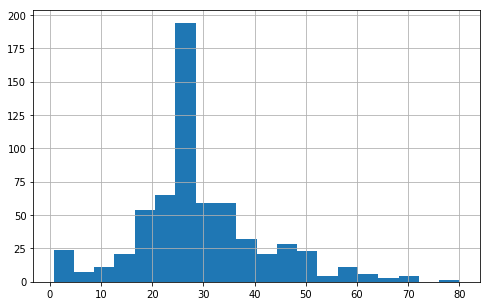

In [8]:
plt.rcParams['figure.figsize'] = [8, 5]
dftrain.age.hist(bins=20)
plt.show()


**Make some observations on the unfortundate :( data set**

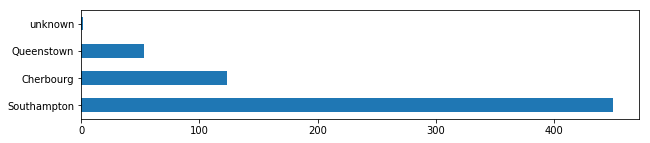

In [9]:
plt.rcParams['figure.figsize'] = [10, 2]
dftrain.embark_town.value_counts().plot(kind='barh')
plt.show()


**Survived passengers for each class**

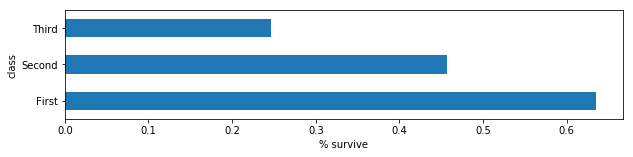

In [10]:
plt.rcParams['figure.figsize'] = [10, 2]
pd.concat([dftrain, y_train], axis=1).groupby('class').survived.mean().plot(kind='barh').set_xlabel('% survive')
plt.show()


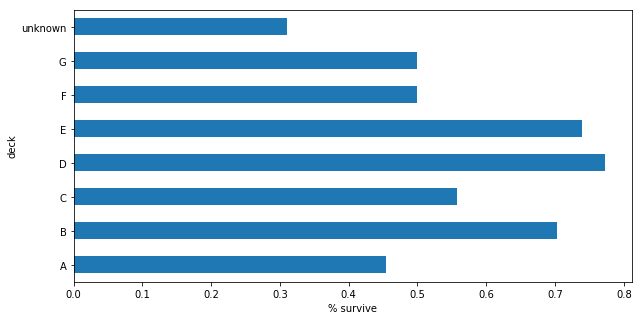

In [11]:
plt.rcParams['figure.figsize'] = [10, 5]
pd.concat([dftrain, y_train], axis=1).groupby('deck').survived.mean().plot(kind='barh').set_xlabel('% survive')
plt.show()

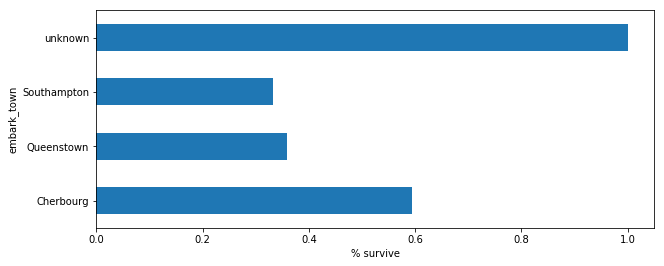

In [12]:
plt.rcParams['figure.figsize'] = [10, 4]
pd.concat([dftrain, y_train], axis=1).groupby('embark_town').survived.mean().plot(kind='barh').set_xlabel('% survive')
plt.show()

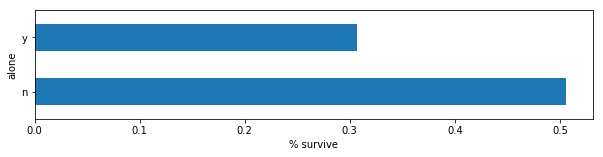

In [13]:
plt.rcParams['figure.figsize'] = [10, 2]
pd.concat([dftrain, y_train], axis=1).groupby('alone').survived.mean().plot(kind='barh').set_xlabel('% survive')
plt.show()

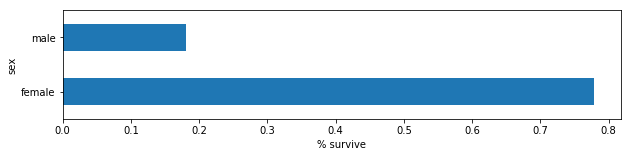

In [14]:
plt.rcParams['figure.figsize'] = [10, 2]
pd.concat([dftrain, y_train], axis=1).groupby('sex').survived.mean().plot(kind='barh').set_xlabel('% survive')
plt.show()

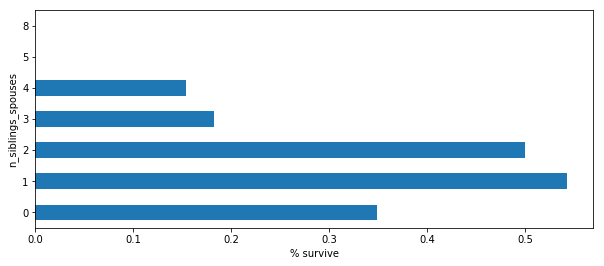

In [15]:
plt.rcParams['figure.figsize'] = [10, 4]
pd.concat([dftrain, y_train], axis=1).groupby('n_siblings_spouses').survived.mean().plot(kind='barh').set_xlabel('% survive')
plt.show()

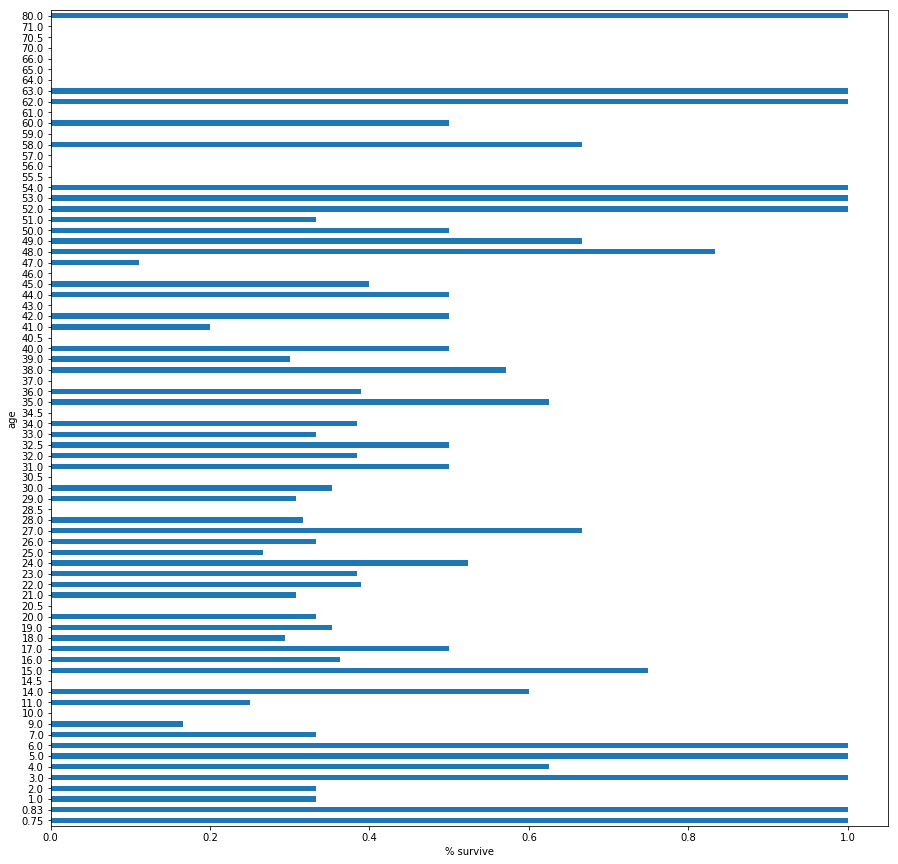

In [16]:
plt.rcParams['figure.figsize'] = [15, 15]
pd.concat([dftrain, y_train], axis=1).groupby('age').survived.mean().plot(kind='barh').set_xlabel('% survive')
plt.show()

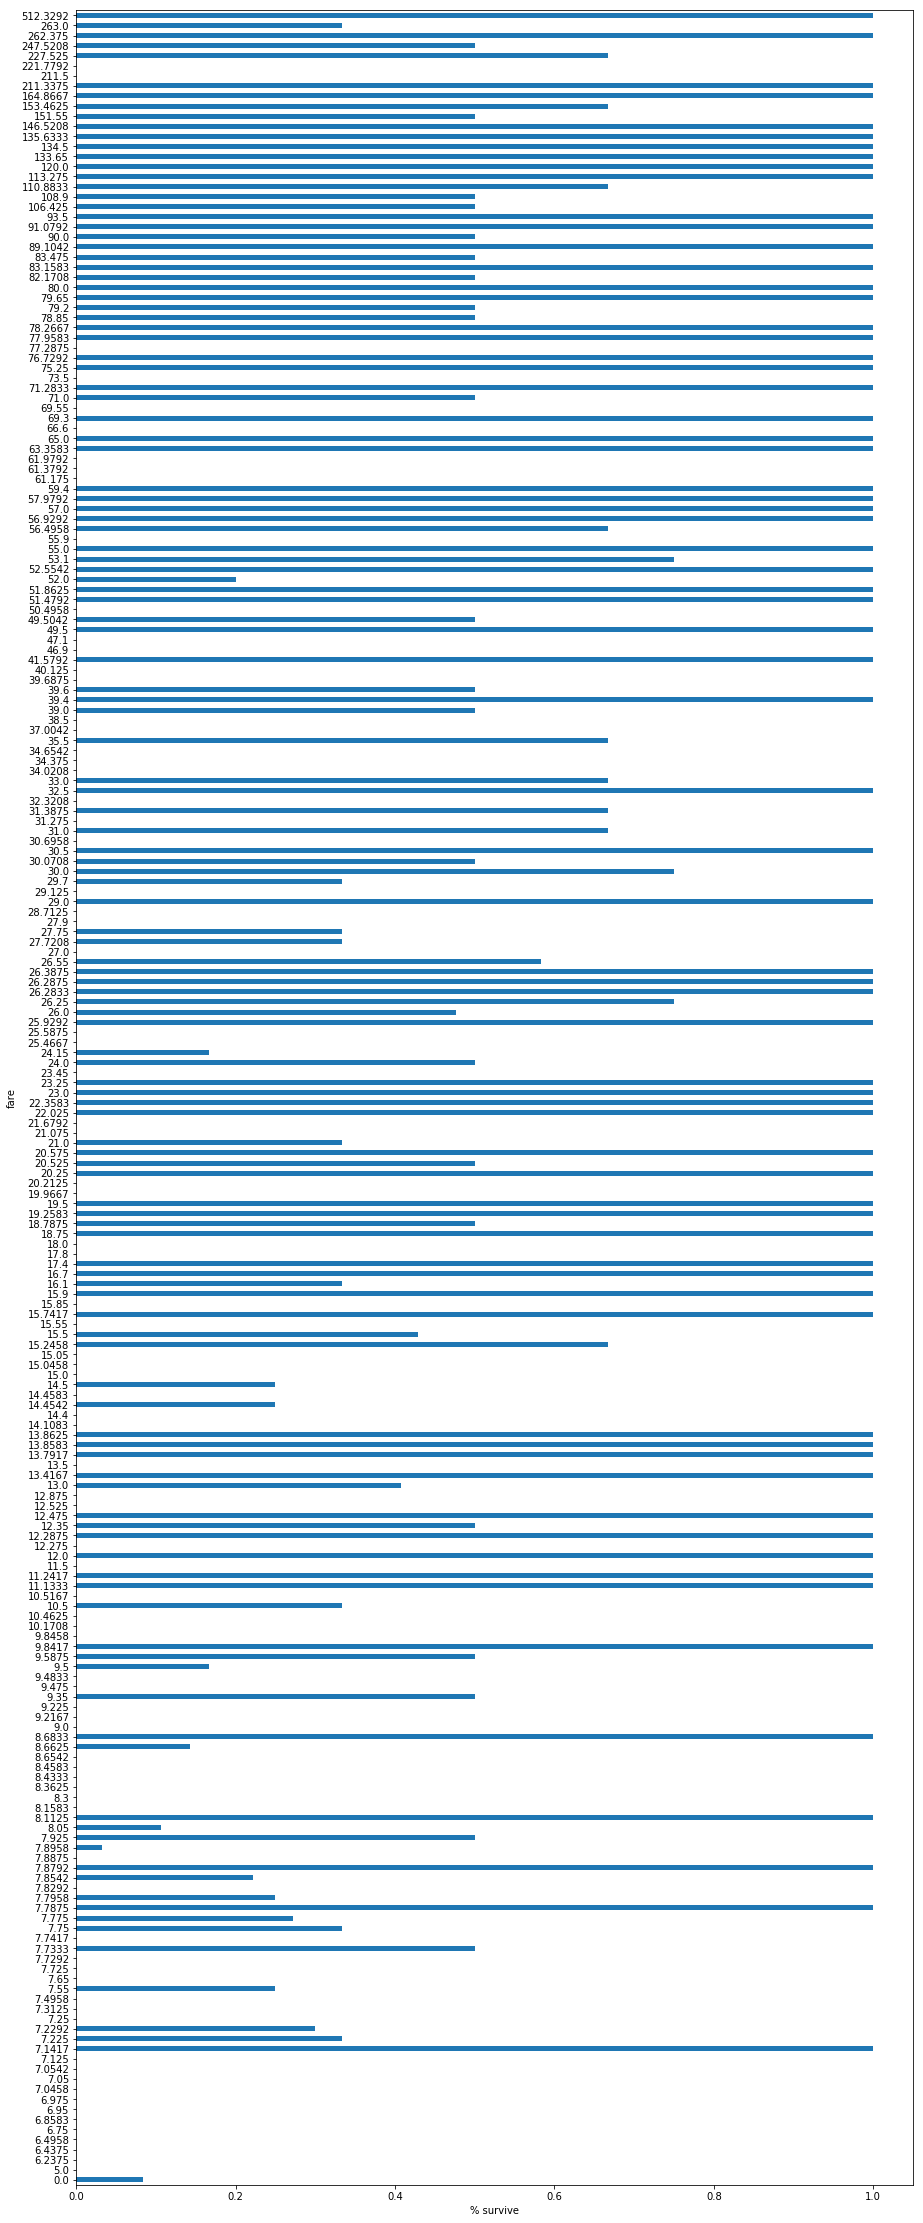

In [17]:
plt.rcParams['figure.figsize'] = [15, 40]
pd.concat([dftrain, y_train], axis=1).groupby('fare').survived.mean().plot(kind='barh').set_xlabel('% survive')
plt.show()

**Alright! lets get started! by now you must be wondering how to run learning algorithms on categorial features(we care only about numbers right!). Dataset has categorial features like embark_town, deck, class etc. These are strings but all the algorithms need numericals right. So, we have to change categorial features to numerical features. There are three different ways to do that, here we present one and the easiest way to do that**

In [18]:
# Get dummies
dftrain = pd.get_dummies(dftrain, prefix_sep='_', drop_first=False)
dfeval = pd.get_dummies(dfeval, prefix_sep='_', drop_first=False)
dftrain.shape
dfeval.shape


(264, 22)

**Here we are dropping one of the features to align training and evaluation datasets, you can use this to drop features you might consider unnecessary**

In [19]:
dftrain = dftrain.drop(columns="deck_G")
dftrain.shape

(627, 22)

**Decision Tree Classification**

In [20]:
dtc = DecisionTreeClassifier(max_depth=1)
dtc.fit(dftrain, y_train)
y_pred = dtc.predict(dfeval)
print("Accuracy:",metrics.accuracy_score(y_eval, y_pred)*100,"%")

Accuracy: 74.24242424242425 %


**Adaptive boosting for Decision Tree Classification**

In [21]:
abc = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3),n_estimators=50,
                         learning_rate=1)
# Train Adaboost Classifer
model = abc.fit(dftrain, y_train)

#Predict the response for test dataset
y_pred = model.predict(dfeval)

print("Accuracy:",metrics.accuracy_score(y_eval, y_pred)*100,"%")

Accuracy: 74.24242424242425 %


**Linear SVM classifier**

In [22]:
svclassifier = SVC(kernel='linear')
svclassifier.fit(dftrain, y_train)
y_pred = svclassifier.predict(dfeval)
print("Accuracy:",metrics.accuracy_score(y_eval, y_pred)*100,"%")

Accuracy: 75.37878787878788 %


In [23]:

svc=SVC(probability=True, kernel='linear')

# Create adaboost classifer object
abc =AdaBoostClassifier(n_estimators=90, base_estimator=svc,learning_rate=.01)

# Train Adaboost Classifer
model = abc.fit(dftrain, y_train)

#Predict the response for test dataset
y_pred = model.predict(dfeval)
print("Accuracy:",metrics.accuracy_score(y_eval, y_pred)*100,"%")


Accuracy: 75.0 %


**Use SVM classifier with polynomial or radial basis function as kernel and later apply boosting and share your observations**

In [24]:
dftrain = dftrain.drop(columns="deck_unknown")
dftrain = dftrain.drop(columns="alone_n")
dftrain = dftrain.drop(columns="sex_female")
dftrain = dftrain.drop(columns="fare")
dftrain = dftrain.drop(columns="embark_town_unknown")
dftrain = dftrain.drop(columns="embark_town_Queenstown")
dftrain = dftrain.drop(columns="embark_town_Cherbourg")

dfeval = dfeval.drop(columns="deck_unknown")
dfeval = dfeval.drop(columns="alone_n")
dfeval = dfeval.drop(columns="sex_female")
dfeval = dfeval.drop(columns="fare")
dfeval = dfeval.drop(columns="embark_town_unknown")
dfeval = dfeval.drop(columns="embark_town_Queenstown")
dfeval = dfeval.drop(columns="embark_town_Cherbourg")

In [25]:
dftrain.shape
dfeval.shape

(264, 15)

In [26]:
def print_results(results):
    print('Best Parameters: {}'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('Accuracy: {} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

**My Approach:** Using the model selection 

In [27]:
from sklearn.model_selection import GridSearchCV

svm_param = {'C': [1, 10, 100],
         'gamma' :[1, 0.1, 0.01, 0.001],
         'kernel': ['linear', 'rbf']}
         
svm_grid = GridSearchCV(estimator=SVC(), param_grid=svm_param, n_jobs=-1)
svm_grid.fit(dftrain,y_train)
print("\nTraining results for SVM grid search: \n")
print_results(svm_grid)
sv_y_pred = svm_grid.best_estimator_.predict(dfeval)
print("\nAccuracy (SVM):",metrics.accuracy_score(y_eval, sv_y_pred)*100,"%")


Training results for SVM grid search: 

Best Parameters: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Accuracy: 0.804 (+/-0.058) for {'C': 1, 'gamma': 1, 'kernel': 'linear'}
Accuracy: 0.748 (+/-0.051) for {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
Accuracy: 0.804 (+/-0.058) for {'C': 1, 'gamma': 0.1, 'kernel': 'linear'}
Accuracy: 0.802 (+/-0.057) for {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Accuracy: 0.804 (+/-0.058) for {'C': 1, 'gamma': 0.01, 'kernel': 'linear'}
Accuracy: 0.753 (+/-0.039) for {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
Accuracy: 0.804 (+/-0.058) for {'C': 1, 'gamma': 0.001, 'kernel': 'linear'}
Accuracy: 0.617 (+/-0.037) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
Accuracy: 0.804 (+/-0.058) for {'C': 10, 'gamma': 1, 'kernel': 'linear'}
Accuracy: 0.743 (+/-0.031) for {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
Accuracy: 0.804 (+/-0.058) for {'C': 10, 'gamma': 0.1, 'kernel': 'linear'}
Accuracy: 0.804 (+/-0.079) for {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Accuracy: 0.804 (+/-0.058) 

In [28]:
sv_boost_param = {'n_estimators': [5, 50, 100, 250, 500],
               'learning_rate': [0.001, 0.01, 0.1, 1, 10, 100]}
sv_boost_grid = GridSearchCV(estimator = AdaBoostClassifier(base_estimator=svm_grid.best_estimator_, algorithm='SAMME'), param_grid=sv_boost_param, n_jobs=-1)
sv_boost_grid.fit(dftrain,y_train)
print("\n Training results for SVM grid search: \n")
print_results(sv_boost_grid)
svB_y_pred = sv_boost_grid.best_estimator_.predict(dfeval)
print("Accuracy (SVM + Adaboost):",metrics.accuracy_score(y_eval, svB_y_pred)*100,"%")


 Training results for SVM grid search: 

Best Parameters: {'learning_rate': 1, 'n_estimators': 50}
Accuracy: 0.617 (+/-0.03) for {'learning_rate': 0.001, 'n_estimators': 5}
Accuracy: 0.617 (+/-0.03) for {'learning_rate': 0.001, 'n_estimators': 50}
Accuracy: 0.62 (+/-0.033) for {'learning_rate': 0.001, 'n_estimators': 100}
Accuracy: 0.619 (+/-0.031) for {'learning_rate': 0.001, 'n_estimators': 250}
Accuracy: 0.62 (+/-0.033) for {'learning_rate': 0.001, 'n_estimators': 500}
Accuracy: 0.617 (+/-0.03) for {'learning_rate': 0.01, 'n_estimators': 5}
Accuracy: 0.62 (+/-0.033) for {'learning_rate': 0.01, 'n_estimators': 50}
Accuracy: 0.624 (+/-0.034) for {'learning_rate': 0.01, 'n_estimators': 100}
Accuracy: 0.632 (+/-0.04) for {'learning_rate': 0.01, 'n_estimators': 250}
Accuracy: 0.636 (+/-0.054) for {'learning_rate': 0.01, 'n_estimators': 500}
Accuracy: 0.622 (+/-0.036) for {'learning_rate': 0.1, 'n_estimators': 5}
Accuracy: 0.63 (+/-0.046) for {'learning_rate': 0.1, 'n_estimators': 50}
Ac

**It's all yours now, get the best possible accuracy in doing so understand the concepts we learnt in class. Hold on fellas, one more thing, don't push yourself so hard to get 100% though!**

**Observations:** 

- Also the features 'sex_female', 'alone_n', 'fare', 'embark_town' are dropped as they dont appear to contribute to the dataset.

- Even after searching for the best combination of SVM classifier as a base estimator for the AdaBoost classifier and tuning the Adaboost for maximum performance, we are only able to get an accuracy of 75% on the dataset. Hence we look for the combination of Decision Tree classifier and AdaBoost to obtain the best result.

In [29]:
decision_tree_param = {'criterion': ['gini', 'entropy'],
                       'splitter': ['best', 'random'],
                       'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}
         
decision_tree_grid = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=decision_tree_param, n_jobs=-1)
decision_tree_grid.fit(dftrain,y_train)
print("Training results for Decision Tree grid search:")
print_results(decision_tree_grid)
dtree = decision_tree_grid.best_estimator_
dtree_pred = dtree.predict(dfeval)
print("Decision tree:",metrics.accuracy_score(y_eval, dtree_pred)*100,"%")

Training results for Decision Tree grid search:
Best Parameters: {'criterion': 'gini', 'max_depth': 4, 'splitter': 'random'}
Accuracy: 0.805 (+/-0.051) for {'criterion': 'gini', 'max_depth': 1, 'splitter': 'best'}
Accuracy: 0.805 (+/-0.051) for {'criterion': 'gini', 'max_depth': 1, 'splitter': 'random'}
Accuracy: 0.805 (+/-0.051) for {'criterion': 'gini', 'max_depth': 2, 'splitter': 'best'}
Accuracy: 0.805 (+/-0.051) for {'criterion': 'gini', 'max_depth': 2, 'splitter': 'random'}
Accuracy: 0.794 (+/-0.036) for {'criterion': 'gini', 'max_depth': 3, 'splitter': 'best'}
Accuracy: 0.81 (+/-0.093) for {'criterion': 'gini', 'max_depth': 3, 'splitter': 'random'}
Accuracy: 0.809 (+/-0.058) for {'criterion': 'gini', 'max_depth': 4, 'splitter': 'best'}
Accuracy: 0.818 (+/-0.088) for {'criterion': 'gini', 'max_depth': 4, 'splitter': 'random'}
Accuracy: 0.81 (+/-0.039) for {'criterion': 'gini', 'max_depth': 5, 'splitter': 'best'}
Accuracy: 0.804 (+/-0.05) for {'criterion': 'gini', 'max_depth': 5, 

In [30]:
boost_param = {'n_estimators': [5, 50, 100, 250, 500],
               'learning_rate': [0.001, 0.01, 0.1, 0.2, 1, 10, 100]}
boost_grid = GridSearchCV(estimator = AdaBoostClassifier(base_estimator=dtree), param_grid=boost_param, n_jobs=-1)
boost_grid.fit(dftrain,y_train)
# boost_grid.predict(dfeval)

print("\nTraining results for AdaBoost grid search:")
print_results(boost_grid)
boost_pred = boost_grid.best_estimator_.predict(dfeval)
print("Decision tree:",metrics.accuracy_score(y_eval, boost_pred)*100,"%")


Training results for AdaBoost grid search:
Best Parameters: {'learning_rate': 0.001, 'n_estimators': 250}
Accuracy: 0.809 (+/-0.073) for {'learning_rate': 0.001, 'n_estimators': 5}
Accuracy: 0.812 (+/-0.095) for {'learning_rate': 0.001, 'n_estimators': 50}
Accuracy: 0.807 (+/-0.099) for {'learning_rate': 0.001, 'n_estimators': 100}
Accuracy: 0.813 (+/-0.103) for {'learning_rate': 0.001, 'n_estimators': 250}
Accuracy: 0.799 (+/-0.102) for {'learning_rate': 0.001, 'n_estimators': 500}
Accuracy: 0.81 (+/-0.087) for {'learning_rate': 0.01, 'n_estimators': 5}
Accuracy: 0.791 (+/-0.097) for {'learning_rate': 0.01, 'n_estimators': 50}
Accuracy: 0.797 (+/-0.085) for {'learning_rate': 0.01, 'n_estimators': 100}
Accuracy: 0.801 (+/-0.104) for {'learning_rate': 0.01, 'n_estimators': 250}
Accuracy: 0.793 (+/-0.077) for {'learning_rate': 0.01, 'n_estimators': 500}
Accuracy: 0.797 (+/-0.087) for {'learning_rate': 0.1, 'n_estimators': 5}
Accuracy: 0.788 (+/-0.09) for {'learning_rate': 0.1, 'n_estima

**In the next step I fine tune the model to obtain the desired accuracy**

In [95]:
best_dtree = DecisionTreeClassifier(criterion='entropy', max_depth=4, splitter='random')
best_boosting = AdaBoostClassifier(base_estimator=best_dtree, learning_rate=0.01, n_estimators=500)
best_model = best_boosting.fit(dftrain, y_train)

#Predict the response for test dataset
y_pred = best_model.predict(dfeval)
print("Accuracy:",metrics.accuracy_score(y_eval, y_pred)*100,"%")

Accuracy: 82.57575757575758 %
